In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.datasets import mnist

In [2]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [3]:
print('Train data shape')
print(x_train.shape)
print(y_train.shape)
print('Test data shape')
print(x_test.shape)
print(y_test.shape)

Train data shape
(60000, 28, 28)
(60000,)
Test data shape
(10000, 28, 28)
(10000,)


In [0]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

Image no. # 0


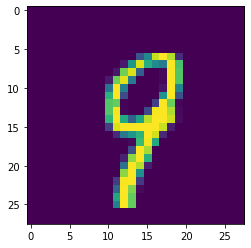

Image no. # 1


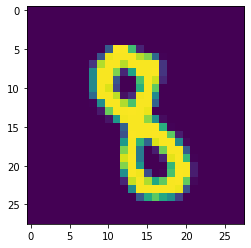

Image no. # 2


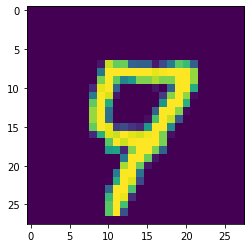

Image no. # 3


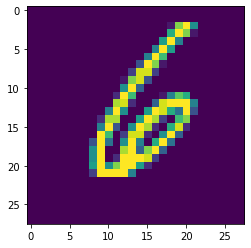

Image no. # 4


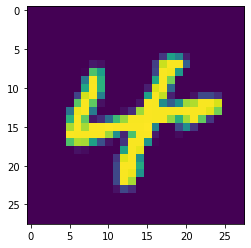

Image no. # 5


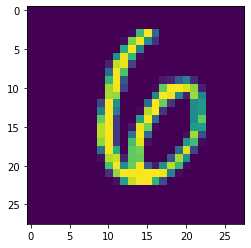

In [5]:
for i in range(6):
    num = np.random.randint(0, len(x_train))
    image = x_train[num]
    print('Image no. #',str(i))
    plt.imshow(image)
    plt.show()

In [0]:
# Reshaping the image to (60,60,1) to make it suitable for feeding it to the model.

In [0]:
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)

In [8]:
print('Train data shape')
print(x_train.shape)
print(y_train.shape)
print('Test data shape')
print(x_test.shape)
print(y_test.shape)

Train data shape
(60000, 28, 28, 1)
(60000,)
Test data shape
(10000, 28, 28, 1)
(10000,)


In [9]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [0]:
# Normalizing data between 0 and 1
x_train = x_train/255.0
x_test = x_test/255.0

In [12]:
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
y_train = np_utils.to_categorical(y_train, num_classes=10)
y_test = np_utils.to_categorical(y_test, num_classes=10)

In [14]:
print(y_train.shape)
print(y_test.shape)

(60000, 10)
(10000, 10)


In [0]:
from tensorflow.keras.optimizers import SGD
opt = SGD(0.01)

In [16]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape = (28,28,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.01),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               692352    
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [17]:
history = model.fit(x_train, y_train, batch_size=128, epochs=50, validation_data=(x_test, y_test))

Epoch 1/50
469/469 [==============================] - 2s 5ms/step - loss: 1.0645 - accuracy: 0.6940 - val_loss: 0.3910 - val_accuracy: 0.8913
Epoch 2/50
469/469 [==============================] - 2s 4ms/step - loss: 0.4472 - accuracy: 0.8663 - val_loss: 0.2910 - val_accuracy: 0.9184
Epoch 3/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3699 - accuracy: 0.8878 - val_loss: 0.2464 - val_accuracy: 0.9299
Epoch 4/50
469/469 [==============================] - 2s 4ms/step - loss: 0.3219 - accuracy: 0.9037 - val_loss: 0.2168 - val_accuracy: 0.9375
Epoch 5/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2889 - accuracy: 0.9129 - val_loss: 0.1967 - val_accuracy: 0.9435
Epoch 6/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2649 - accuracy: 0.9201 - val_loss: 0.1787 - val_accuracy: 0.9486
Epoch 7/50
469/469 [==============================] - 2s 4ms/step - loss: 0.2474 - accuracy: 0.9258 - val_loss: 0.1679 - val_accuracy: 0.9514
Epoch 

In [23]:
score = model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0663 - accuracy: 0.9782


In [0]:
history_dict = history.history

In [0]:
loss = history_dict['loss']
val_loss = history_dict['val_loss']
epochs = range(1, len(loss)+1)

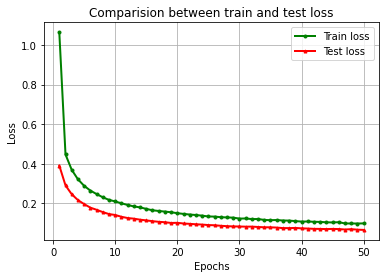

In [21]:
plt.plot(epochs, loss, color='green', marker='o', markersize = 3, linewidth = 2, label='Train loss')
plt.plot(epochs, val_loss, color='red', marker='^', markersize = 3, linewidth = 2, label='Test loss')
plt.title('Comparision between train and test loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid()
plt.legend()
plt.show()

In [26]:
pred = model.predict_classes(x_test[:1])
pred

array([7])

In [28]:
x_test[1].shape

(28, 28, 1)

In [29]:
print(model.predict_classes(x_test[1].reshape(1, 28,28, 1)))

[2]


In [0]:
def predict_class(input1, model):
    input1 = input1.reshape(1, input1.shape[0], input1.shape[1], input1.shape[2])
    pred = model.predict_classes(input1) 
    return pred

In [40]:
print(predict_class(x_test[10], model))

[0]


In [41]:
print(predict_class(x_test[100], model))

[6]


In [45]:
for i in range(10):
    num = np.random.randint(0, len(x_test))
    pred = predict_class(x_test[num], model)
    print('Actual',np.argmax(y_test[num]))
    print('Predicted', pred[0])

Actual 4
Predicted 4
Actual 1
Predicted 1
Actual 3
Predicted 3
Actual 5
Predicted 5
Actual 2
Predicted 2
Actual 6
Predicted 6
Actual 0
Predicted 0
Actual 7
Predicted 7
Actual 7
Predicted 7
Actual 6
Predicted 6
